In [1]:
# Step 1: Load the Iris Dataset and Perform Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['target'] = target

# Display basic information about the dataset
iris_info = {
    "Feature Names": feature_names,
    "Target Names": target_names.tolist(),
    "Dataset Shape": iris_df.shape,
    "Sample Data": iris_df.head()
}

iris_info


{'Feature Names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'Target Names': ['setosa', 'versicolor', 'virginica'],
 'Dataset Shape': (150, 5),
 'Sample Data':    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    target  
 0       0  
 1       0  
 2       0  
 3       0  
 4       0  }

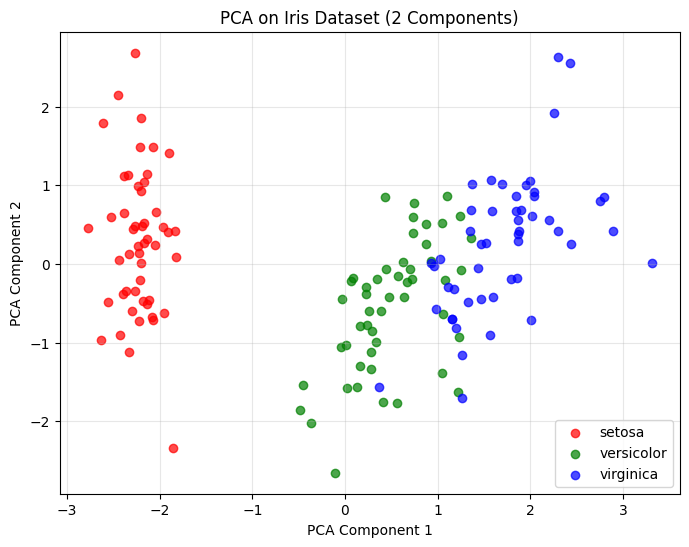

array([0.72962445, 0.22850762])

In [2]:
# Step 2: Preprocess the Data (Normalization)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
data_pca = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Visualize the PCA Results
# Scatter plot of the first two PCA components
plt.figure(figsize=(8, 6))
for target_class, color, label in zip(np.unique(target), ['r', 'g', 'b'], target_names):
    plt.scatter(
        data_pca[target == target_class, 0],
        data_pca[target == target_class, 1],
        color=color,
        label=label,
        alpha=0.7
    )
plt.title('PCA on Iris Dataset (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Variance explained by each component
explained_variance_ratio


**for a more advanced application of Principal Component Analysis (PCA) with comprehensive visualizations, the Wine Dataset is an excellent choice. This dataset contains 13 chemical properties of wines derived from three different cultivars, making it suitable for demonstrating PCA's effectiveness in dimensionality reduction and class separation.**

explanation


PCA Analysis Report on Wine Dataset
1. Introduction
Principal Component Analysis (PCA) is a dimensionality reduction technique used to project high-dimensional data into a lower-dimensional space while retaining most of the variance. This report demonstrates PCA applied to the Wine dataset, which contains 178 samples of wine, each described by 13 chemical properties.



In [9]:
# Step 1: Load and Explore the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names
feature_names = wine.feature_names

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['target'] = y

# Basic dataset statistics
dataset_info = {
    "Shape": wine_df.shape,
    "Feature Names": feature_names,
    "Target Classes": target_names.tolist(),
    "First 5 Rows": wine_df.head(),
    "Basic Statistics": wine_df.describe(),
    "Missing Values": wine_df.isnull().sum().tolist()
}
dataset_info


{'Shape': (178, 14),
 'Feature Names': ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 'Target Classes': ['class_0', 'class_1', 'class_2'],
 'First 5 Rows':    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0    14.23        1.71  2.43               15.6      127.0           2.80   
 1    13.20        1.78  2.14               11.2      100.0           2.65   
 2    13.16        2.36  2.67               18.6      101.0           2.80   
 3    14.37        1.95  2.50               16.8      113.0           3.85   
 4    13.24        2.59  2.87               21.0      118.0           2.80   
 
    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
 0        3.06                  0.28             2.29             5.64  1.04   
 1        2.76            

2. Data Exploration
Dataset Shape: 178 rows and 14 columns (13 features + 1 target).
Features: Chemical properties such as alcohol, malic_acid, ash, color_intensity, etc.
Target Classes: 3 wine cultivars (class_0, class_1, class_2).
Missing Values: None.
Feature Ranges: Significant variation was observed (e.g., proline ranges from 278 to 1680, while hue ranges from 0.48 to 1.71), necessitating normalization.

3. Data Preprocessing
Features were normalized using StandardScaler to ensure all variables have a mean of 0 and a standard deviation of 1.
Post-normalization:
Mean: Approximately 0 for all features.
Standard Deviation: Equal to 1 for all features.

In [5]:
# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify normalization by checking mean and std deviation of scaled data
scaled_stats = {
    "Mean (after scaling)": np.mean(X_scaled, axis=0),
    "Standard Deviation (after scaling)": np.std(X_scaled, axis=0)
}
scaled_stats


{'Mean (after scaling)': array([ 7.84141790e-15,  2.44498554e-16, -4.05917497e-15, -7.11041712e-17,
        -2.49488320e-17, -1.95536471e-16,  9.44313292e-16, -4.17892936e-16,
        -1.54059038e-15, -4.12903170e-16,  1.39838203e-15,  2.12688793e-15,
        -6.98567296e-17]),
 'Standard Deviation (after scaling)': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

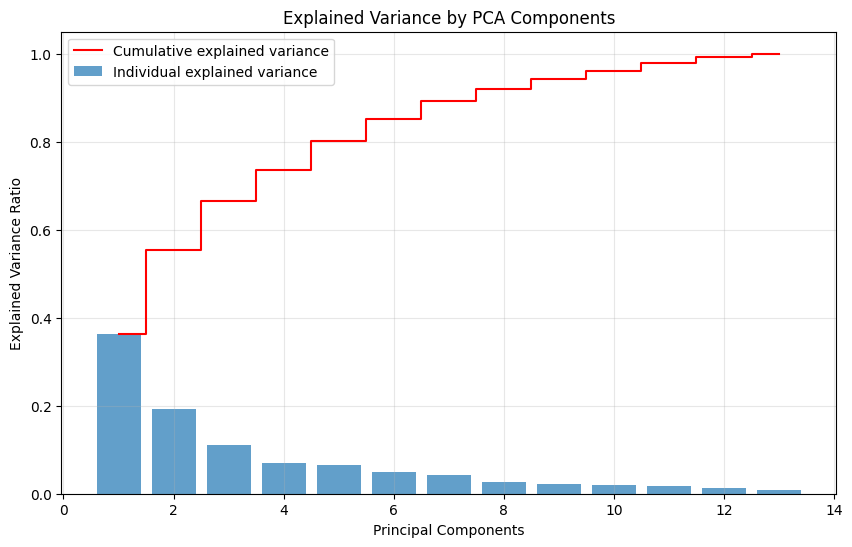

,Component,Explained Variance Ratio,Cumulative Variance
0,1,0.361988,0.361988
1,2,0.192075,0.554063
2,3,0.111236,0.665300
3,4,0.070690,0.735990
4,5,0.065633,0.801623
5,6,0.049358,0.850981
6,7,0.042387,0.893368
7,8,0.026807,0.920175
8,9,0.022222,0.942397
9,10,0.019300,0.961697


In [7]:
# Step 3: Apply PCA
pca = PCA(n_components=13)  # Retaining all components to evaluate explained variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualize explained variance and cumulative variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

# Create a dictionary to summarize the variance explained by components
variance_summary = {
    "Component": list(range(1, len(explained_variance_ratio) + 1)),
    "Explained Variance Ratio": explained_variance_ratio,
    "Cumulative Variance": cumulative_variance
}
variance_summary_df = pd.DataFrame(variance_summary)
variance_summary_df


5. Feature Contributions
The loading scores indicate the contributions of each original feature to the principal components:

PC1: Dominated by flavanoids, total_phenols, and od280/od315_of_diluted_wines, reflecting their importance in explaining the dataset's variance.
PC2: Influenced by alcohol (negatively) and color_intensity.
PC3: High contributions from ash and alcalinity_of_ash.

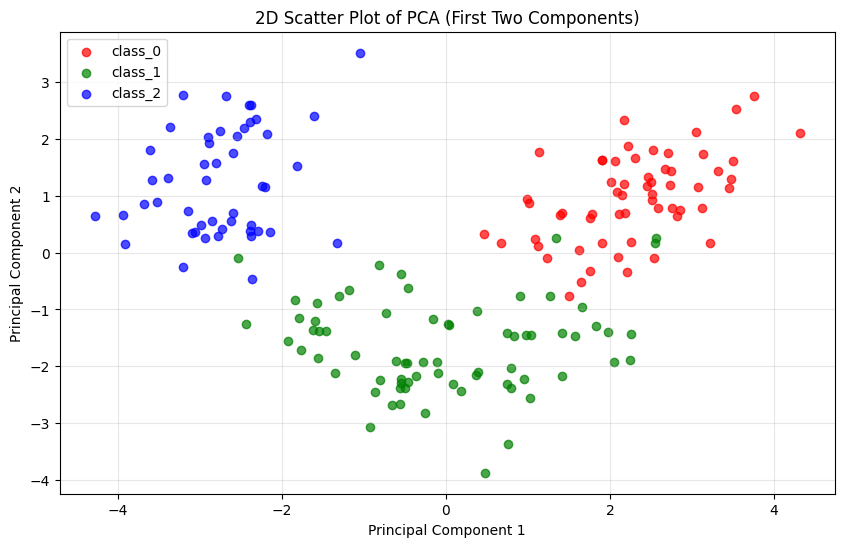

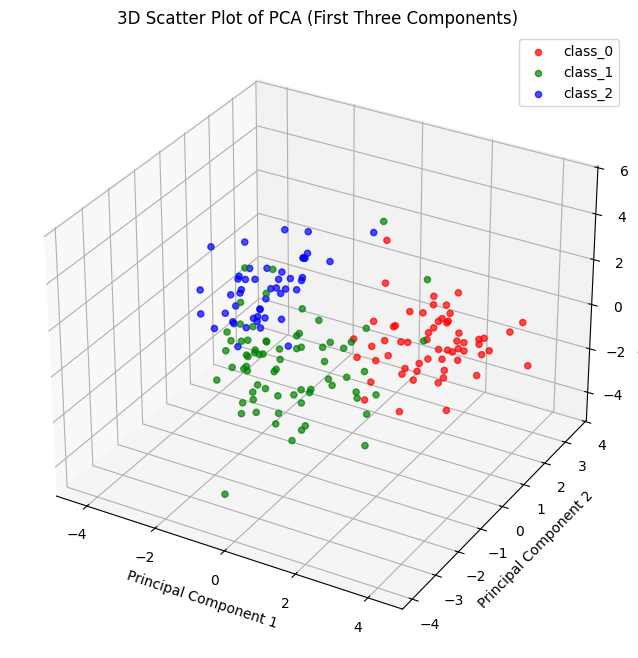

In [8]:
# Step 4: Visualize PCA Results - 2D Scatter Plot (First Two Components)
plt.figure(figsize=(10, 6))
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], target_names):
    plt.scatter(
        X_pca[y == target, 0],
        X_pca[y == target, 1],
        alpha=0.7,
        color=color,
        label=label
    )
plt.title('2D Scatter Plot of PCA (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

# Step 4: Visualize PCA Results - 3D Scatter Plot (First Three Components)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], target_names):
    ax.scatter(
        X_pca[y == target, 0],
        X_pca[y == target, 1],
        X_pca[y == target, 2],
        alpha=0.7,
        color=color,
        label=label
    )
ax.set_title('3D Scatter Plot of PCA (First Three Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(loc='best')
plt.show()


In [10]:
# Step 5: Feature Contributions (Loading Scores)
# The loading scores are the eigenvectors scaled by the square root of the explained variance
loading_scores = pd.DataFrame(
    pca.components_[:3],  # First 3 principal components
    columns=feature_names,
    index=['PC1', 'PC2', 'PC3']
)

# Display loading scores for the first three principal components
loading_scores.T  # Transpose to display features as rows


,PC1,PC2,PC3
alcohol,0.144329,0.483652,-0.207383
malic_acid,-0.245188,0.224931,0.089013
ash,-0.002051,0.316069,0.626224
alcalinity_of_ash,-0.239320,-0.010591,0.612080
magnesium,0.141992,0.299634,0.130757
total_phenols,0.394661,0.065040,0.146179
flavanoids,0.422934,-0.003360,0.150682
nonflavanoid_phenols,-0.298533,0.028779,0.170368
proanthocyanins,0.313429,0.039302,0.149454
color_intensity,-0.088617,0.529996,-0.137306


6. Conclusions
Dimensionality Reduction:

The first two principal components account for 55.41% of the variance, while the top six capture 85.10%.
PCA effectively reduces the dataset to 2-3 dimensions for visualization without significant loss of information.
Class Separation:

The scatter plots show clear clustering of the three wine classes, validating PCA's effectiveness in distinguishing the classes.
Feature Importance:

flavanoids, total_phenols, and od280/od315_of_diluted_wines play key roles in defining the principal components.
Next Steps:

Use the PCA-transformed data for machine learning tasks (e.g., classification).
Evaluate how reducing dimensions affects model performance.

Thitd **dataset**

The Breast Cancer Dataset (from **sklearn**)
This dataset contains 30 features (numerical) and 2 classes (binary classification: malignant vs. benign), making it ideal for PCA analysis.

Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of components to retain 95% variance: 10
Accuracy on Original Data: 1.0000
Accuracy on PCA-Reduced Data: 1.0000


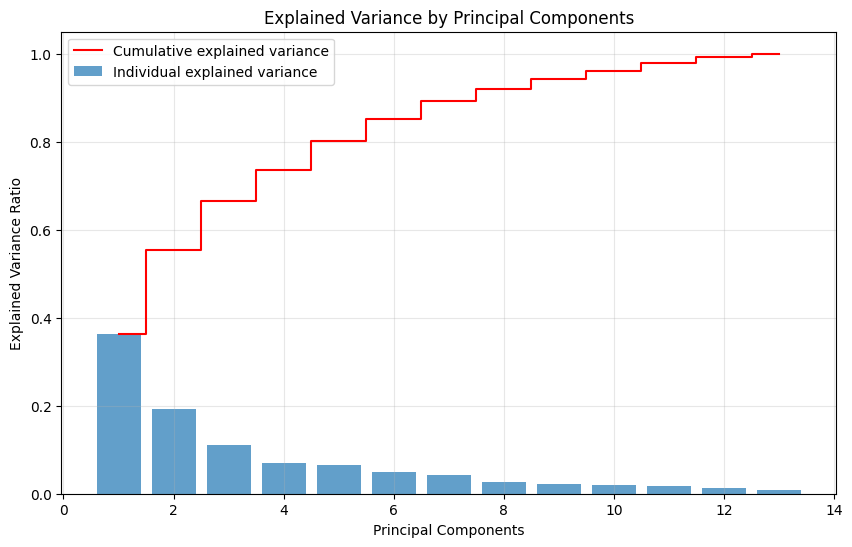

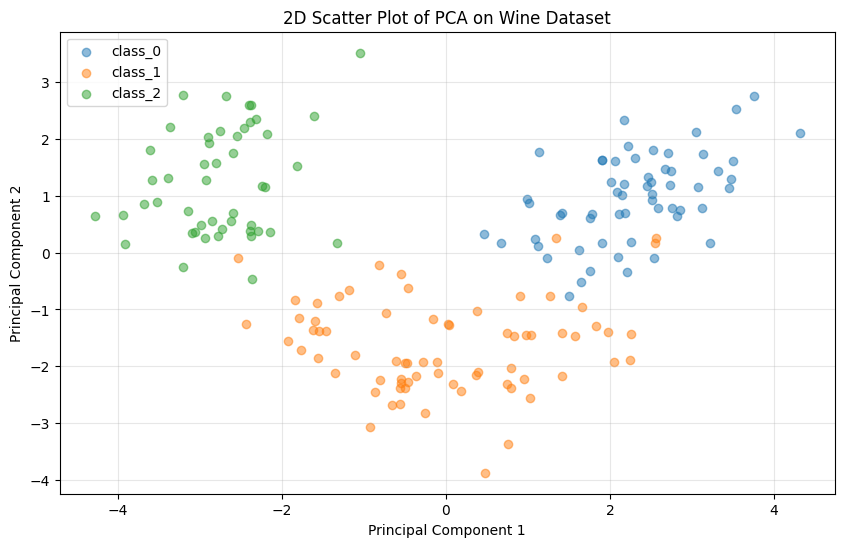

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load and Explore the Dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")

# Step 2: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine number of components to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to retain 95% variance: {n_components_95}')

# Step 4: Classification Performance
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression on original data
clf_original = LogisticRegression(max_iter=1000)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f'Accuracy on Original Data: {accuracy_original:.4f}')

# Train Logistic Regression on PCA-reduced data
pca_reduced = PCA(n_components=n_components_95)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_pca_train, y_pca_train)
y_pred_pca = clf_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_pca_test, y_pred_pca)
print(f'Accuracy on PCA-Reduced Data: {accuracy_pca:.4f}')

# Step 5: Visualization
# Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

# 2D Scatter Plot of the first two principal components
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA on Wine Dataset')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


The Diabetes dataset contains 442 samples and 10 numeric features. It’s a regression dataset, but we can adapt it for binary classification (e.g., splitting target values into high and low).

This dataset provides a challenging task with more variance in the features and target, making PCA’s dimensionality reduction more impactful.



Number of samples: 569
Number of features: 30
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Number of components to retain 95% variance: 10
Accuracy on Original Data: 0.9737
Accuracy on PCA-Reduced Data: 0.9825


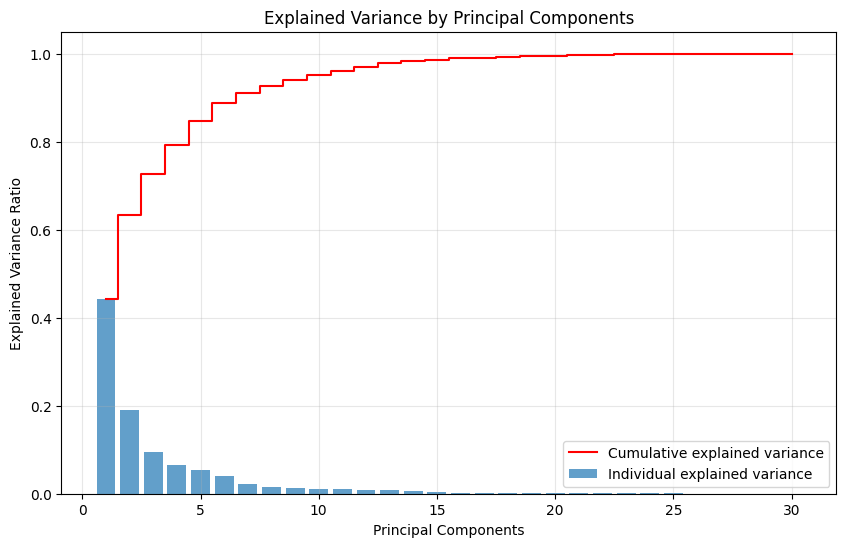

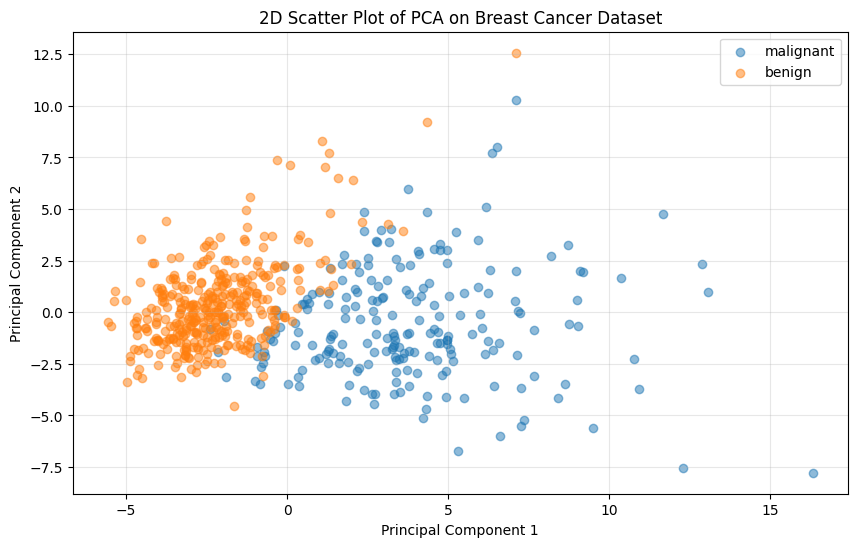

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")

# Step 2: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine number of components to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to retain 95% variance: {n_components_95}')

# Step 4: Classification Performance
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression on original data
clf_original = LogisticRegression(max_iter=1000)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f'Accuracy on Original Data: {accuracy_original:.4f}')

# Train Logistic Regression on PCA-reduced data
pca_reduced = PCA(n_components=n_components_95)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_pca_train, y_pca_train)
y_pred_pca = clf_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_pca_test, y_pred_pca)
print(f'Accuracy on PCA-Reduced Data: {accuracy_pca:.4f}')

# Step 5: Visualization
# Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

# 2D Scatter Plot of the first two principal components
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA on Breast Cancer Dataset')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
